# Compulsory Assignment 1 - Pandas and visualizations

### Imports

In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


---
## Loading and exploring the dataset

__1. Load the dataset named `airbnb.csv` and store it in a dataframe called `raw_df`. Use the column named `ìd` as the index column for the dataframe__

In [229]:
# Insert your code below
# ======================
raw_df = pd.read_csv('airbnb.csv', index_col='id')

__2. Print the first `five` rows of the dataframe__

In [230]:
# Insert your code below
# ======================
print(raw_df.head(5))

                                                     name  host_id  host_name  \
id                                                                              
183319                  Panoramic Ocean View Venice Beach   867995  Barbara X   
109     Amazing bright elegant condo park front *UPGRA...      521      Paolo   
51307   Spanish Bungalow Guest House LA CA. 30 plus ni...   235568      David   
184314                    Boho Chic Flat..Steps to Beach!   884031     Ashley   
51498   Guest House With Its Own Entrance/Exit and Hot...   236758        Bay   

          neighbourhood  latitude  longitude        room_type  price  \
id                                                                     
183319           Venice  33.99211 -118.47600  Entire home/apt    152   
109         Culver City  33.98301 -118.38607  Entire home/apt    115   
51307   Atwater Village  34.12206 -118.26783  Entire home/apt     75   
184314           Venice  33.97487 -118.46312  Entire home/apt    125   


__3. How many unique values exist in each of the columns `state` and `city`?__

In [231]:
# Insert your code below
# ======================
print("Unique States: " + str(raw_df["state"].nunique()))
print("Unique Cities: " + str(raw_df["city"].nunique()))

Unique States: 19
Unique Cities: 31


__4. Identify missing (NaN) values in each of the columns in the dataset__

In [232]:
# Insert your code below
# ======================
raw_df.isna().sum()

name                                19
host_id                              0
host_name                         1144
neighbourhood                      712
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
state                                0
city                                 0
dtype: int64

__5. Create a copy of `raw_df` named `df`. Remove any rows containing NaN values in the new dataframe. What is the shape of `df` before and after removing the NaN values?__

In [233]:
# Insert your code below
# ======================
df = raw_df.dropna()
print(raw_df.shape)
print(df.shape)


(325858, 15)
(323983, 15)


__6. Which `room_type`, `state` and `city` is the most popular (by number of instances)? Print the name and count of each__

Hint: The output should look something like this:
```python
Column: [col], Most popular: [name], Count: [count]
Column: [col], Most popular: [name], Count: [count]
Column: [col], Most popular: [name], Count: [count]
```

In [234]:
# Insert your code below
# ======================
columnNames = ["room_type","state","city"]

for name in columnNames:
    print("Column: " + name + 
          ", Most popular: " + str(df[name].value_counts().axes[0][0]) + 
          ", Count: " + str(df[name].value_counts()[0]))

Column: room_type, Most popular: Entire home/apt, Count: 241433
Column: state, Most popular: CA, Count: 127206
Column: city, Most popular: Los Angeles, Count: 91600


__7. What is the average and median `price` for a listing?__

In [235]:
# Insert your code below
# ======================

print(df["price"].mean())
print(df["price"].median())

285.125163974653
159.0


__8. What is the average price for the states `CA`, `FL` and `NY`?__

Hint: The output should look something like this:
```python
State: [col], Average price: [price]
State: [col], Average price: [price]
State: [col], Average price: [price]
```

In [236]:
# Insert your code below
# ======================
stateNames = ["CA", "FL", "NY"]

for name in stateNames:
    sf = df[df["state"] == name]
    print("State: " + name + ", Average price: " + str(sf["price"].mean()))

State: CA, Average price: 288.39531940317283
State: FL, Average price: 241.98664420647336
State: NY, Average price: 197.21922246220302


__9. Create a new dataframe called `df_beach` containing all listings with "beach" in the `name`. Print out the shape of `beach_df`__

The filtering should not be case sensitive, meaning that names containing `beach`, `Beach`, `BeAcH` etc. all should be included


In [237]:
# Insert your code below
# ======================
beach_df = df[df['name'].str.contains('beach', case = False)]

print(beach_df.shape)

(31436, 15)


---

## Visualizing the dataset

__10. Create plot with 2 vertical axes and one horizontal axes. The plot should display a barchart containing the `count` of the `10 most popular` states and cities, each in its own subplot. The bars should be sorted in descending order.__

Use `df` in all tasks in this section

Hint: It is recommended to use the `Barplot` function built into Seaborn for barcharts.

The output should look something like this:

<img src="assets/ex10.png"
     alt="Barchart example"/>

PS: Disregard the color scheme of the example image.

[]

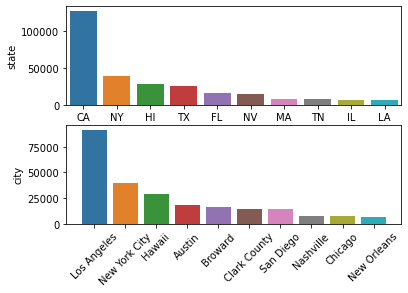

In [238]:
# Insert your code below
# ======================
fig, axes = plt.subplots(2, 1)
plt.xticks(rotation=45)

#States
sns.barplot(ax=axes[0], x=df["state"].value_counts()[0:10].axes[0], y=df["state"].value_counts()[0:10])

#Cities
sns.barplot(ax=axes[1], x=df["city"].value_counts()[0:10].axes[0], y=df["city"].value_counts()[0:10])
plt.plot()

__11. Create a scatterplot with the longitude and latitude of the listings in `df`. Longitude should be on the x-axis and latitude on the y-axis.__ 

The output should look something like this:

<img src="assets/ex11.png"
     alt="Scatterplot example"/>

PS: Disregard the color scheme of the example image.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

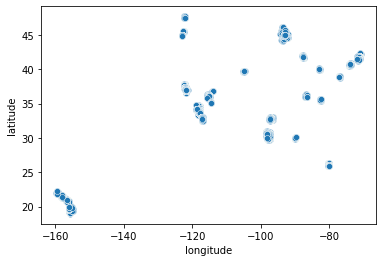

In [239]:
# Insert your code below
# ======================
sns.scatterplot(x = df["longitude"], y = df["latitude"])

__12. Create a matrix containing the correlations between the different columns in `df`. Plot it as a heatmap using Seaborn or similar. What does the plot tell you about correlations? Which columns are the most correlated to `price`?__

<AxesSubplot:>

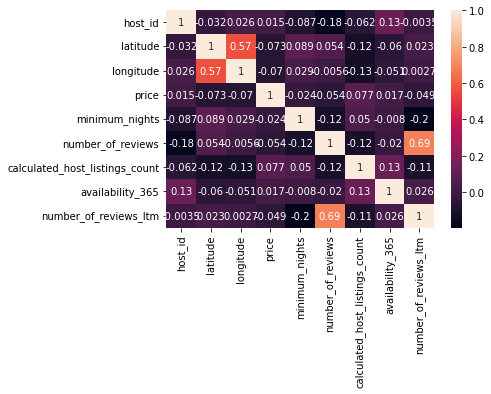

In [240]:
# Insert your code below
# ======================
sns.heatmap(df.corr(), annot = True)

The number of reviews and the number of listings a host has influence the price the most.